In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from datetime import datetime

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Affichage complet des colonnes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

## 2. Chargement et concaténation des datasets Spark Auto

In [49]:
# Chemins des fichiers Spark Auto
data_dir = '../Data/row/'
files = [
    'spark_auto_voitures_20251128_0051421.csv',
    'spark_auto_voitures_20251128_0124262.csv',
    'spark_auto_voitures_20251128_0137433.csv',
    'spark_auto_voitures_20251128_1123233.csv',
    'spark_auto_voitures_20251128_1140064.csv',
    'spark_auto_voitures_20251128_1158474.csv',
    'spark_auto_voitures_20251128_1216235.csv'
]

# Charger tous les fichiers
dfs = []
for file in files:
    filepath = os.path.join(data_dir, file)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath)
        print(f"✓ Chargé: {file} - {len(df)} lignes")
        dfs.append(df)
    else:
        print(f"⚠️ Fichier non trouvé: {file}")

# Concaténer tous les datasets
df_raw = pd.concat(dfs, ignore_index=True)

print(f"\n{'='*60}")
print(f"Total après concaténation: {len(df_raw)} voitures")
print(f"{'='*60}")

✓ Chargé: spark_auto_voitures_20251128_0051421.csv - 10 lignes
✓ Chargé: spark_auto_voitures_20251128_0124262.csv - 20 lignes
✓ Chargé: spark_auto_voitures_20251128_0137433.csv - 20 lignes
✓ Chargé: spark_auto_voitures_20251128_1123233.csv - 59 lignes
✓ Chargé: spark_auto_voitures_20251128_1140064.csv - 30 lignes
✓ Chargé: spark_auto_voitures_20251128_1158474.csv - 30 lignes
✓ Chargé: spark_auto_voitures_20251128_1216235.csv - 34 lignes

Total après concaténation: 203 voitures


In [50]:
# Afficher un aperçu des données brutes
print("Aperçu des données brutes:")
df_raw.head(10)

Aperçu des données brutes:


,Nom,Description,Prix,Référence,Main,Kilométrage,Catégorie,1ère Immat.,Puissance Fiscale,Moteur,Carburant,Consommation,Transmission,URL
0,Mercedes CLA 180,AMG LINE,"145,000 DT",6208,1 ere Main,3 200 Km,Berline,Septembre 2021,7 CV,136 CV,Essence,5.9L / 100 km,Automatique,https://www.sparkauto.tn/listing-detail/344/Me...
1,MG ZS,1.5 l,"67,500 DT",5900,1ere main,58 000 Km,SUV,Mai 2022,7 cv,114 cv,Essence,6.9L/100 KM,Manuelle,https://www.sparkauto.tn/listing-detail/343/MGZS
2,Kia Seltos,1.4,"84,500 DT",5947,1ere main,83 000 Km,SUV,Mai 2021,8 cv,140 cv,Essence,6.4L/100KM,Automatique,https://www.sparkauto.tn/listing-detail/342/Ki...
3,Peugeot 308 GT,1.2 l,"119,000 DT",5772,1ere main,18 000 Km,Compact,Septembre 2024,7 cv,130 cv,Hybride,5.0 L / 100 km,Automatique,https://www.sparkauto.tn/listing-detail/341/Pe...
4,BMW Série 4 Gran Coupé Pack M,1.5 l,"107,000 DT",6214,1ere main,132 000 Km,Berline,Juin 2020,7 cv,136 cv,Essence,6.2L/100KM,Automatique,https://www.sparkauto.tn/listing-detail/340/BM...
5,Kia Picanto,1.2L,"39,500 DT",6186,1 ere Main,73 000 Km,Citadine,Septembre 2020,4 CV,67 CV,Essence,4.4 L / 100 km,Manuelle,https://www.sparkauto.tn/listing-detail/339/Ki...
6,Mercedes Classe C 180,180 CGI AVANTGRADE,"97,500 DT",6093,NaN,148 000 Km,Berline,Septembre 2018,8 CV,156 CV,Essence,5.0 L / 100 km,Automatique,https://www.sparkauto.tn/listing-detail/338/Me...
7,Peugeot 208,1.2L,"32,000 DT",6038,1 ere Main,96 000 Km,Citadine,Janvier 2020,4 CV,75 CV,Essence,4.9 L / 100 km,Manuelle,https://www.sparkauto.tn/listing-detail/337/Pe...
8,Suzuki Ciaz,1.5L GLX,"55,000 DT",5839,1 ere Main,52 500 Km,Berline,Février 2023,6 CV,105 CV,Essence,5.7 L / 100 km,Manuelle,https://www.sparkauto.tn/listing-detail/336/Su...
9,Toyota Rav 4 hybride,2.5 l,"139,500 DT",5008,1ere main,58 900 Km,SUV,Mars 2023,Ariana,222 ch,Hybride,5 L / 100 km,Automatique,https://www.sparkauto.tn/listing-detail/335/To...


In [51]:
# Informations sur le dataset
print("Informations sur le dataset:")
df_raw.info()

Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nom                203 non-null    object
 1   Description        203 non-null    object
 2   Prix               203 non-null    object
 3   Référence          203 non-null    int64 
 4   Main               197 non-null    object
 5   Kilométrage        203 non-null    object
 6   Catégorie          201 non-null    object
 7   1ère Immat.        203 non-null    object
 8   Puissance Fiscale  203 non-null    object
 9   Moteur             203 non-null    object
 10  Carburant          203 non-null    object
 11  Consommation       203 non-null    object
 12  Transmission       203 non-null    object
 13  URL                203 non-null    object
dtypes: int64(1), object(13)
memory usage: 22.3+ KB


## 3. Suppression des doublons

In [52]:
# Supprimer les doublons basés sur l'URL
print(f"Nombre de doublons (URL): {df_raw.duplicated(subset=['URL']).sum()}")
df = df_raw.drop_duplicates(subset=['URL'], keep='first')
print(f"Dataset après suppression des doublons: {len(df)} voitures")

# Réinitialiser l'index
df = df.reset_index(drop=True)

Nombre de doublons (URL): 0
Dataset après suppression des doublons: 203 voitures


## 4. Extraction de la marque depuis la colonne 'Nom'

In [53]:
# Extraire la marque (premier mot du nom)
def extract_brand(nom):
    if pd.isna(nom) or nom == 'N/A':
        return 'Unknown'
    brand = str(nom).split()[0]
    return brand.strip()

df['Marque'] = df['Nom'].apply(extract_brand)

# Standardisation des noms de marques
def standardize_brand(brand):
    corrections = {
        'Bmw': 'BMW',
        'Mg': 'MG',
        'Gwm': 'GWM',
        'Byd': 'BYD',
        'Ds': 'DS',
        'Volkswagen': 'VW'
    }
    return corrections.get(brand, brand)

df['Marque'] = df['Marque'].apply(standardize_brand)

print("Distribution des marques (APRÈS STANDARDISATION):")
print(df['Marque'].value_counts())

Distribution des marques (APRÈS STANDARDISATION):
Marque
Mercedes      19
Peugeot       19
BMW           15
Audi          12
Ford          12
Kia           11
VW            11
Hyundai       10
Chery          7
Seat           6
MG             6
Toyota         6
Fiat           5
Mazda          5
Honda          4
Renault        4
Land           4
Suzuki         4
Geely          4
Opel           4
Porsche        3
Haval          3
Nissan         3
LAND           3
Citroen        2
Skoda          2
Mini           2
Dongfeng       2
Dacia          2
Jeep           2
Lada           2
Cadillac       1
Great          1
Wallyscar      1
Cupra          1
Jaguar         1
Ssangyong      1
Ssangyoung     1
Volvo          1
Citroën        1
Name: count, dtype: int64


## 5. Nettoyage de la colonne 'Prix'

In [54]:
# Fonction pour nettoyer le prix
def clean_price(price):
    if pd.isna(price) or price == 'N/A':
        return np.nan
    # Enlever 'DT', espaces, virgules et convertir en nombre
    price_str = str(price).replace('DT', '').replace(',', '').replace(' ', '').strip()
    try:
        return float(price_str)
    except:
        return np.nan

df['Prix_Numeric'] = df['Prix'].apply(clean_price)

print(f"Prix - Valeurs manquantes: {df['Prix_Numeric'].isna().sum()}")
print(f"Prix - Statistiques:")
print(df['Prix_Numeric'].describe())

Prix - Valeurs manquantes: 0
Prix - Statistiques:
count       203.000000
mean      83120.197044
std       59475.306765
min       22000.000000
25%       42250.000000
50%       67500.000000
75%       96000.000000
max      380000.000000
Name: Prix_Numeric, dtype: float64


## 6. Nettoyage de la colonne 'Kilométrage'

In [55]:
# Fonction pour nettoyer le kilométrage
def clean_mileage(mileage):
    if pd.isna(mileage) or mileage == 'N/A':
        return np.nan
    # Enlever 'KM', 'km', 'Km', espaces et convertir en nombre
    mileage_str = str(mileage).upper().replace('KM', '').replace(' ', '').strip()
    try:
        return float(mileage_str)
    except:
        return np.nan

df['Kilométrage_Numeric'] = df['Kilométrage'].apply(clean_mileage)

print(f"Kilométrage - Valeurs manquantes: {df['Kilométrage_Numeric'].isna().sum()}")
print(f"Kilométrage - Statistiques:")
print(df['Kilométrage_Numeric'].describe())

Kilométrage - Valeurs manquantes: 0
Kilométrage - Statistiques:
count       203.000000
mean      90173.152709
std       50793.861024
min         750.000000
25%       50000.000000
50%       85000.000000
75%      131500.000000
max      237000.000000
Name: Kilométrage_Numeric, dtype: float64


## 7. Extraction de l'année depuis '1ère Immat.'

In [56]:
# Fonction pour extraire l'année
def extract_year(date_str):
    if pd.isna(date_str):
        return np.nan
    
    date_str = str(date_str).strip()
    
    if date_str in ['N/A', '', 'nan']:
        return np.nan
    
    # Format "Mois YYYY" (ex: Septembre 2021, Mai 2022)
    match = re.search(r'\b(\d{4})\b', date_str)
    if match:
        year = int(match.group(1))
        if 1990 <= year <= 2025:
            return year
    
    return np.nan

df['Année'] = df['1ère Immat.'].apply(extract_year)

print(f"Année - Valeurs manquantes: {df['Année'].isna().sum()}")
print(f"Pourcentage de valeurs extraites: {(1 - df['Année'].isna().sum() / len(df)) * 100:.2f}%")
print(f"\nDistribution des années:")
print(df['Année'].value_counts().sort_index())

Année - Valeurs manquantes: 0
Pourcentage de valeurs extraites: 100.00%

Distribution des années:
Année
2007     1
2009     1
2010     4
2011     2
2012     2
2013     4
2014     9
2015     9
2016    12
2017    25
2018    18
2019    15
2020    27
2021    34
2022    20
2023     7
2024    11
2025     2
Name: count, dtype: int64


## 8. Nettoyage de 'Puissance Fiscale'

In [57]:
# Fonction pour nettoyer la puissance fiscale
def clean_power(power):
    if pd.isna(power) or power == 'N/A':
        return np.nan
    
    power_str = str(power).upper().strip()
    
    # Enlever 'CV', espaces
    power_str = power_str.replace('CV', '').replace(' ', '').strip()
    
    # Essayer d'extraire un nombre
    try:
        return float(power_str)
    except:
        # Essayer d'extraire avec regex
        match = re.search(r'(\d+\.?\d*)', power_str)
        if match:
            return float(match.group(1))
        return np.nan

df['Puissance_Numeric'] = df['Puissance Fiscale'].apply(clean_power)

print(f"Puissance - Valeurs manquantes: {df['Puissance_Numeric'].isna().sum()}")
print(f"\nDistribution de la puissance:")
print(df['Puissance_Numeric'].value_counts().sort_index())

Puissance - Valeurs manquantes: 4

Distribution de la puissance:
Puissance_Numeric
4.0     14
5.0     26
6.0     44
7.0     35
8.0     29
9.0     18
10.0    11
11.0     6
12.0     1
15.0     3
16.0     3
18.0     1
19.0     3
20.0     1
21.0     1
23.0     1
25.0     1
43.0     1
Name: count, dtype: int64


## 9. Standardisation de la colonne 'Carburant' (Énergie)

In [58]:
# Standardisation de la colonne Carburant
def standardize_energie(carburant):
    if pd.isna(carburant):
        return 'Autre'
    
    carburant_str = str(carburant).lower().strip()
    
    if carburant_str == 'essence':
        return 'Essence'
    elif carburant_str == 'diesel':
        return 'Diesel'
    elif 'electrique' in carburant_str or 'électrique' in carburant_str:
        return 'Electrique'
    elif 'hybride' in carburant_str:
        return 'Hybride'
    else:
        return 'Autre'

df['Énergie'] = df['Carburant'].apply(standardize_energie)

print("="*60)
print("Distribution - Énergie (APRÈS STANDARDISATION):")
print("="*60)
print(df['Énergie'].value_counts())
print(f"\nValeurs uniques: {df['Énergie'].nunique()}")

Distribution - Énergie (APRÈS STANDARDISATION):
Énergie
Essence       174
Diesel         17
Hybride        11
Electrique      1
Name: count, dtype: int64

Valeurs uniques: 4


## 10. Standardisation de 'Transmission'

In [59]:
# Renommer la colonne pour compatibilité
df['Boîte_Vitesses'] = df['Transmission']

print("Distribution - Boîte de vitesse:")
print(df['Boîte_Vitesses'].value_counts())

Distribution - Boîte de vitesse:
Boîte_Vitesses
Automatique    112
Manuelle        91
Name: count, dtype: int64


## 11. Analyse des valeurs manquantes

In [60]:
# Colonnes importantes à analyser
important_cols = ['Marque', 'Prix_Numeric', 'Kilométrage_Numeric', 'Année', 
                  'Puissance_Numeric', 'Énergie', 'Boîte_Vitesses']

# Calculer les valeurs manquantes
missing_data = pd.DataFrame({
    'Colonne': important_cols,
    'Valeurs manquantes': [df[col].isna().sum() for col in important_cols],
    'Pourcentage': [df[col].isna().sum() / len(df) * 100 for col in important_cols]
})

missing_data = missing_data.sort_values('Pourcentage', ascending=False)
print("Analyse des valeurs manquantes:")
print(missing_data.to_string(index=False))

Analyse des valeurs manquantes:
            Colonne  Valeurs manquantes  Pourcentage
  Puissance_Numeric                   4     1.970443
             Marque                   0     0.000000
       Prix_Numeric                   0     0.000000
Kilométrage_Numeric                   0     0.000000
              Année                   0     0.000000
            Énergie                   0     0.000000
     Boîte_Vitesses                   0     0.000000


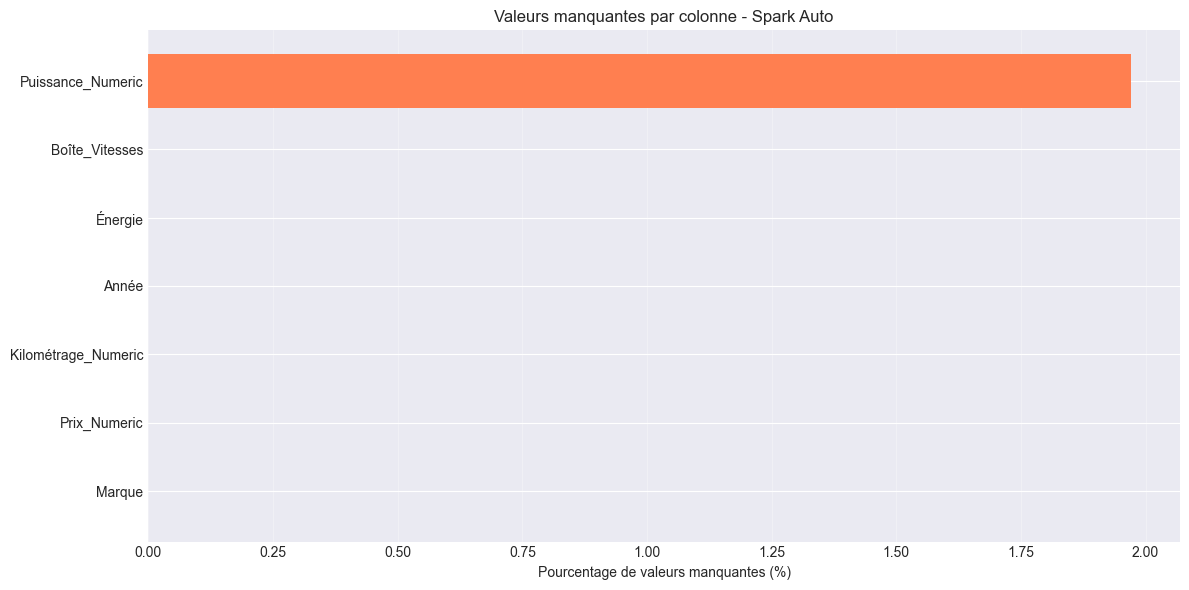

In [61]:
# Visualisation des valeurs manquantes
plt.figure(figsize=(12, 6))
missing_data_sorted = missing_data.sort_values('Pourcentage')
plt.barh(missing_data_sorted['Colonne'], missing_data_sorted['Pourcentage'], color='coral')
plt.xlabel('Pourcentage de valeurs manquantes (%)')
plt.title('Valeurs manquantes par colonne - Spark Auto')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 11b. Visualisation des variables catégorielles

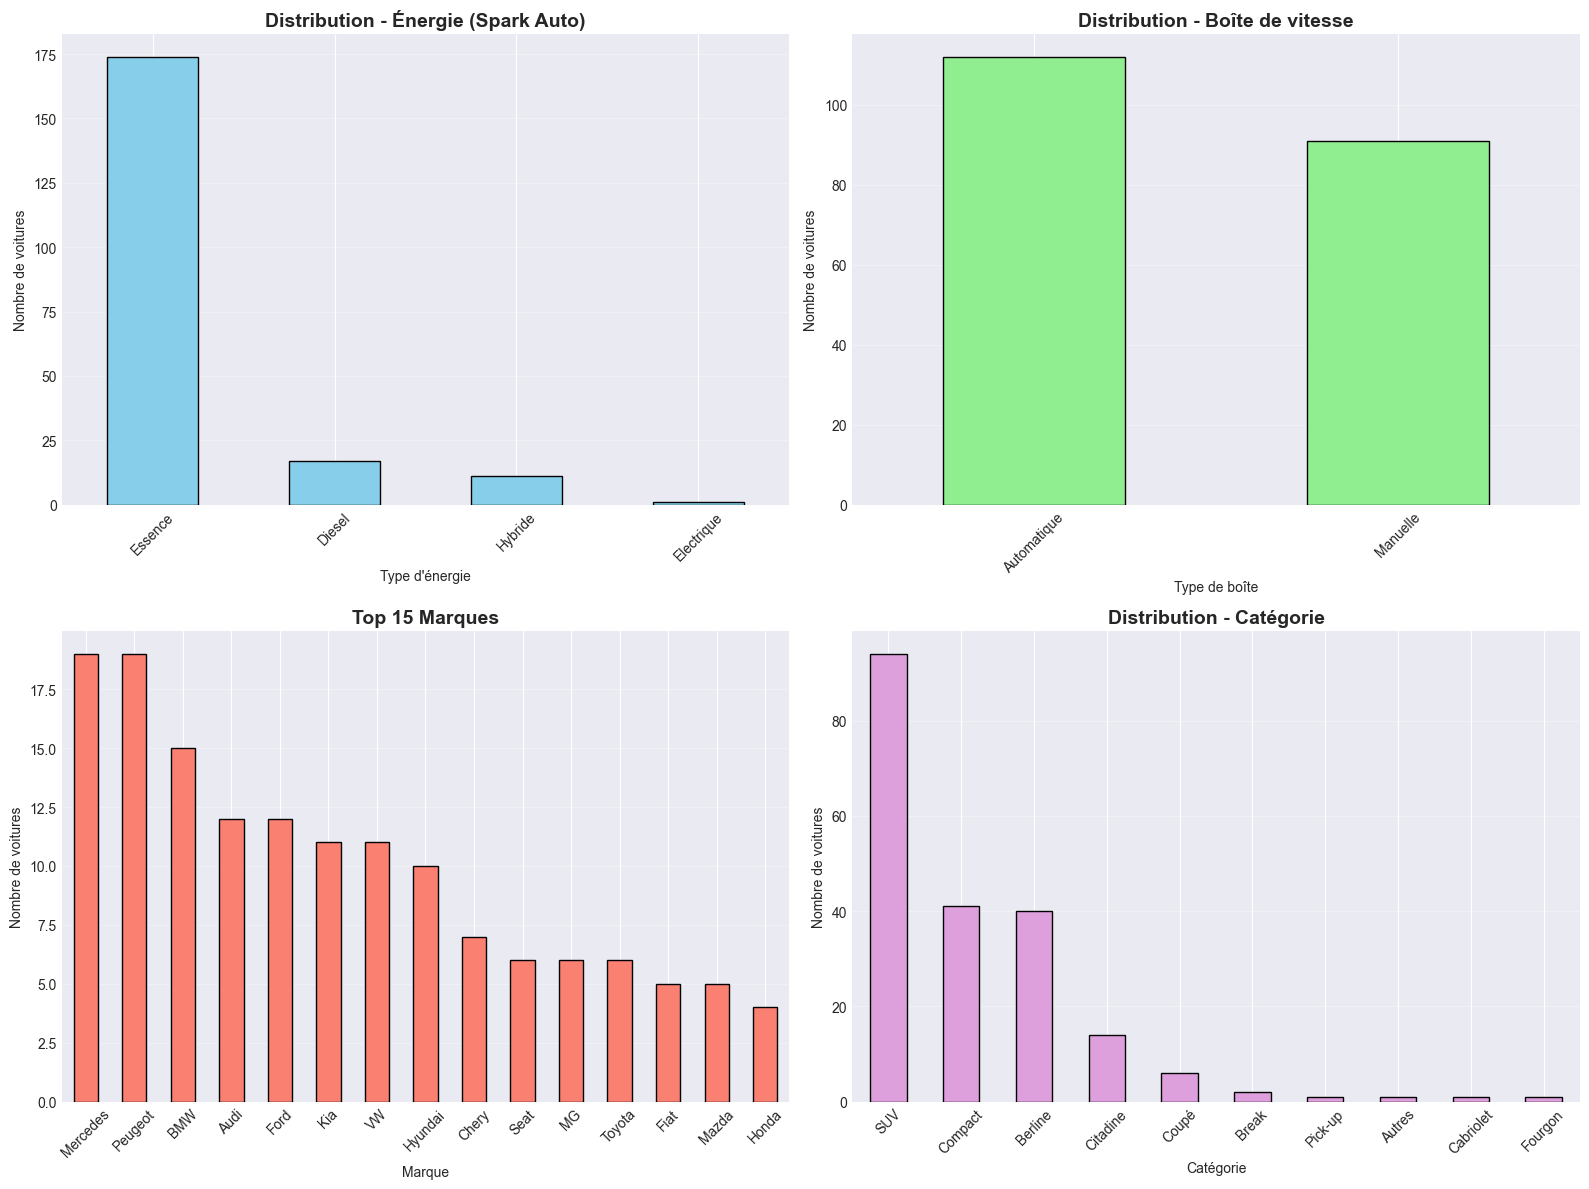

\n============================================================
STATISTIQUES DES VARIABLES CATÉGORIELLES
\nÉnergie - 4 types:
Énergie
Essence       174
Diesel         17
Hybride        11
Electrique      1
Name: count, dtype: int64
\nBoîte de vitesse - 2 types:
Boîte_Vitesses
Automatique    112
Manuelle        91
Name: count, dtype: int64
\nMarque - 40 marques différentes
Top 10 marques:
Marque
Mercedes    19
Peugeot     19
BMW         15
Audi        12
Ford        12
Kia         11
VW          11
Hyundai     10
Chery        7
Seat         6
Name: count, dtype: int64


In [62]:
# Visualisation graphique des variables catégorielles
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Énergie
df['Énergie'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution - Énergie (Spark Auto)', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Nombre de voitures')
axes[0, 0].set_xlabel('Type d\'énergie')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Boîte de vitesse
df['Boîte_Vitesses'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution - Boîte de vitesse', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Nombre de voitures')
axes[0, 1].set_xlabel('Type de boîte')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Marque (top 15)
top_brands = df['Marque'].value_counts().head(15)
top_brands.plot(kind='bar', ax=axes[1, 0], color='salmon', edgecolor='black')
axes[1, 0].set_title('Top 15 Marques', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Nombre de voitures')
axes[1, 0].set_xlabel('Marque')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Catégorie (si disponible)
if 'Catégorie' in df.columns:
    df['Catégorie'].value_counts().plot(kind='bar', ax=axes[1, 1], color='plum', edgecolor='black')
    axes[1, 1].set_title('Distribution - Catégorie', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('Nombre de voitures')
    axes[1, 1].set_xlabel('Catégorie')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(axis='y', alpha=0.3)
else:
    # Si pas de catégorie, afficher une distribution alternative
    axes[1, 1].text(0.5, 0.5, 'Catégorie non disponible', 
                    ha='center', va='center', fontsize=12)
    axes[1, 1].set_title('Distribution - Catégorie', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Statistiques des variables catégorielles
print("\\n" + "="*60)
print("STATISTIQUES DES VARIABLES CATÉGORIELLES")
print("="*60)
print(f"\\nÉnergie - {df['Énergie'].nunique()} types:")
print(df['Énergie'].value_counts())
print(f"\\nBoîte de vitesse - {df['Boîte_Vitesses'].nunique()} types:")
print(df['Boîte_Vitesses'].value_counts())
print(f"\\nMarque - {df['Marque'].nunique()} marques différentes")
print(f"Top 10 marques:")
print(df['Marque'].value_counts().head(10))

## 12. Suppression des lignes sans prix

In [63]:
# Supprimer les lignes où le prix est manquant
print(f"Avant suppression: {len(df)} voitures")
df_clean = df.dropna(subset=['Prix_Numeric']).copy()
print(f"Après suppression (prix manquant): {len(df_clean)} voitures")
print(f"Voitures supprimées: {len(df) - len(df_clean)}")

Avant suppression: 203 voitures
Après suppression (prix manquant): 203 voitures
Voitures supprimées: 0


## 13. Imputation des valeurs manquantes

In [64]:
# Imputation du kilométrage par la médiane groupée par marque
df_clean['Kilométrage_Numeric'] = df_clean.groupby('Marque')['Kilométrage_Numeric'].transform(
    lambda x: x.fillna(x.median())
)

# Si toujours des NaN, utiliser la médiane globale
global_median_mileage = df_clean['Kilométrage_Numeric'].median()
df_clean['Kilométrage_Numeric'] = df_clean['Kilométrage_Numeric'].fillna(global_median_mileage)

print(f"✓ Kilométrage - Valeurs manquantes après imputation: {df_clean['Kilométrage_Numeric'].isna().sum()}")

✓ Kilométrage - Valeurs manquantes après imputation: 0


In [65]:
# Imputation de l'année par la médiane groupée par marque
df_clean['Année'] = df_clean.groupby('Marque')['Année'].transform(
    lambda x: x.fillna(x.median())
)

# Si toujours des NaN, utiliser la médiane globale
global_median_year = df_clean['Année'].median()
df_clean['Année'] = df_clean['Année'].fillna(global_median_year)

print(f"✓ Année - Valeurs manquantes après imputation: {df_clean['Année'].isna().sum()}")

✓ Année - Valeurs manquantes après imputation: 0


In [66]:
# Imputation de la puissance par la médiane groupée par marque
df_clean['Puissance_Numeric'] = df_clean.groupby('Marque')['Puissance_Numeric'].transform(
    lambda x: x.fillna(x.median())
)

# Si toujours des NaN, utiliser la médiane globale
global_median_power = df_clean['Puissance_Numeric'].median()
df_clean['Puissance_Numeric'] = df_clean['Puissance_Numeric'].fillna(global_median_power)

print(f"✓ Puissance - Valeurs manquantes après imputation: {df_clean['Puissance_Numeric'].isna().sum()}")

✓ Puissance - Valeurs manquantes après imputation: 0


In [67]:
# Imputation des variables catégorielles
df_clean['Énergie'] = df_clean['Énergie'].fillna('Unknown')
df_clean['Boîte_Vitesses'] = df_clean['Boîte_Vitesses'].fillna('Unknown')

print("✓ Variables catégorielles - Imputation terminée")

✓ Variables catégorielles - Imputation terminée


## 14. Distribution des variables numériques

In [68]:
# Statistiques descriptives
numeric_cols = ['Prix_Numeric', 'Kilométrage_Numeric', 'Année', 'Puissance_Numeric']
print("Statistiques descriptives:")
print(df_clean[numeric_cols].describe())

Statistiques descriptives:
        Prix_Numeric  Kilométrage_Numeric        Année  Puissance_Numeric
count     203.000000           203.000000   203.000000         203.000000
mean    83120.197044         90173.152709  2018.768473           7.926108
std     59475.306765         50793.861024     3.391981           4.254230
min     22000.000000           750.000000  2007.000000           4.000000
25%     42250.000000         50000.000000  2017.000000           6.000000
50%     67500.000000         85000.000000  2019.000000           7.000000
75%     96000.000000        131500.000000  2021.000000           9.000000
max    380000.000000        237000.000000  2025.000000          43.000000


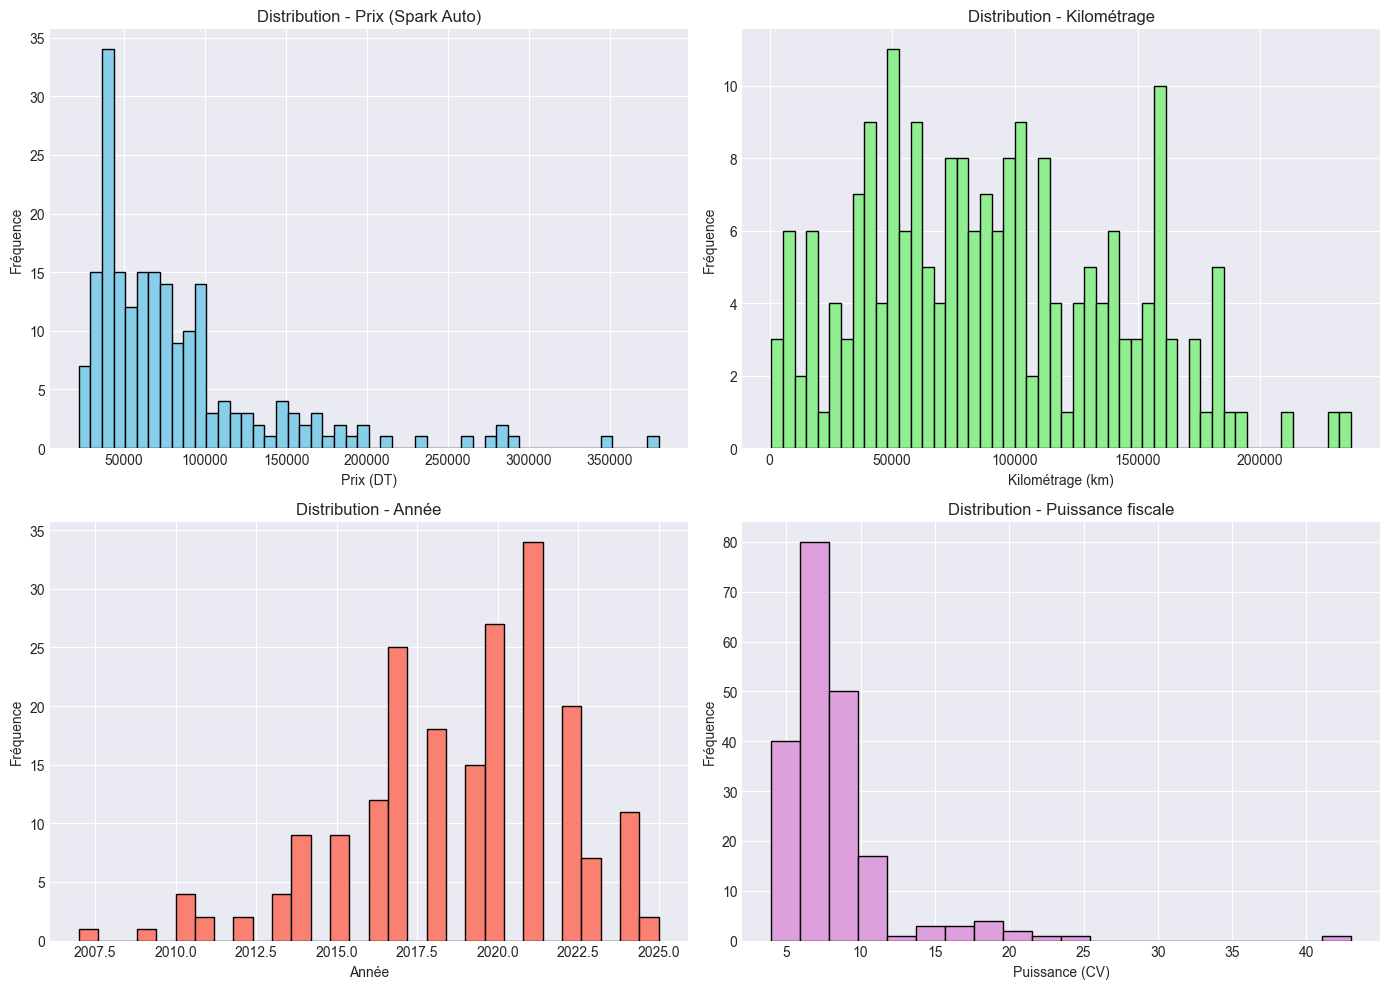

In [69]:
# Visualisation des distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Prix
df_clean['Prix_Numeric'].hist(bins=50, ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution - Prix (Spark Auto)')
axes[0, 0].set_xlabel('Prix (DT)')
axes[0, 0].set_ylabel('Fréquence')

# Kilométrage
df_clean['Kilométrage_Numeric'].hist(bins=50, ax=axes[0, 1], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution - Kilométrage')
axes[0, 1].set_xlabel('Kilométrage (km)')
axes[0, 1].set_ylabel('Fréquence')

# Année
df_clean['Année'].hist(bins=30, ax=axes[1, 0], color='salmon', edgecolor='black')
axes[1, 0].set_title('Distribution - Année')
axes[1, 0].set_xlabel('Année')
axes[1, 0].set_ylabel('Fréquence')

# Puissance
df_clean['Puissance_Numeric'].hist(bins=20, ax=axes[1, 1], color='plum', edgecolor='black')
axes[1, 1].set_title('Distribution - Puissance fiscale')
axes[1, 1].set_xlabel('Puissance (CV)')
axes[1, 1].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

## 15. Détection et traitement des outliers

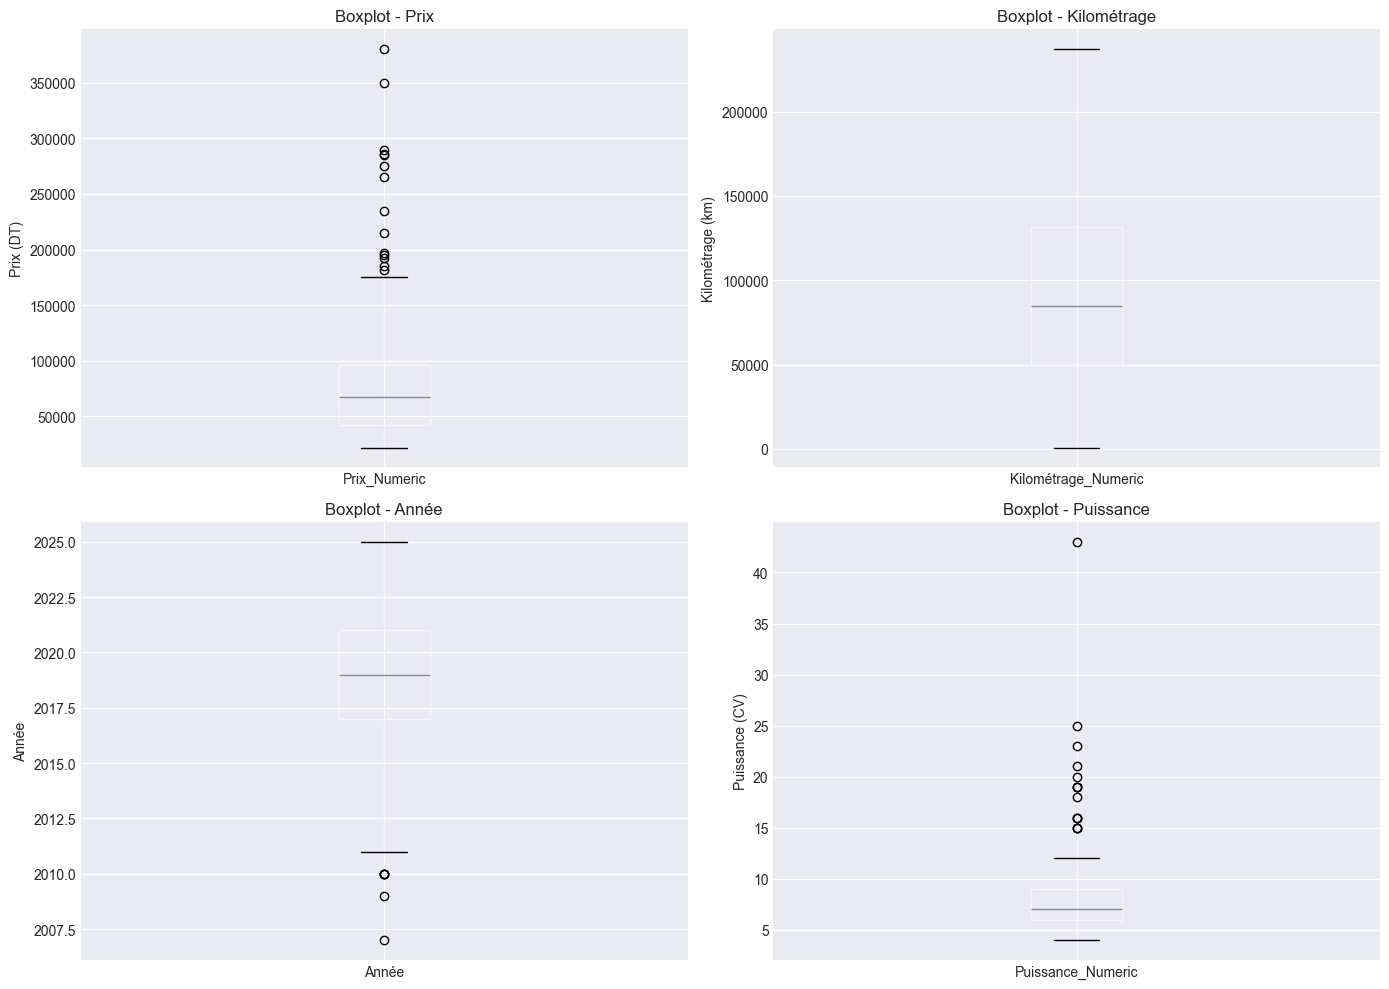

In [70]:
# Boxplots pour identifier les outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

df_clean.boxplot(column='Prix_Numeric', ax=axes[0, 0])
axes[0, 0].set_title('Boxplot - Prix')
axes[0, 0].set_ylabel('Prix (DT)')

df_clean.boxplot(column='Kilométrage_Numeric', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot - Kilométrage')
axes[0, 1].set_ylabel('Kilométrage (km)')

df_clean.boxplot(column='Année', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot - Année')
axes[1, 0].set_ylabel('Année')

df_clean.boxplot(column='Puissance_Numeric', ax=axes[1, 1])
axes[1, 1].set_title('Boxplot - Puissance')
axes[1, 1].set_ylabel('Puissance (CV)')

plt.tight_layout()
plt.show()

In [71]:
# Traiter les outliers avec clipping (1% et 99% percentiles)
print(f"Avant traitement des outliers: {len(df_clean)} voitures")
print("\nValeurs avant clipping:")

for col in numeric_cols:
    print(f"\n{col}:")
    print(f"  Min: {df_clean[col].min():.2f}, Max: {df_clean[col].max():.2f}")
    lower = df_clean[col].quantile(0.01)
    upper = df_clean[col].quantile(0.99)
    print(f"  Percentile 1%: {lower:.2f}, Percentile 99%: {upper:.2f}")


print(f"\n✓ Outliers traités par clipping (1%-99%)")
print(f"Nombre de voitures après traitement: {len(df_clean)}")

Avant traitement des outliers: 203 voitures

Valeurs avant clipping:

Prix_Numeric:
  Min: 22000.00, Max: 380000.00
  Percentile 1%: 24060.00, Percentile 99%: 289430.00

Kilométrage_Numeric:
  Min: 750.00, Max: 237000.00
  Percentile 1%: 5020.00, Percentile 99%: 208670.00

Année:
  Min: 2007.00, Max: 2025.00
  Percentile 1%: 2010.00, Percentile 99%: 2024.00

Puissance_Numeric:
  Min: 4.00, Max: 43.00
  Percentile 1%: 4.00, Percentile 99%: 22.96

✓ Outliers traités par clipping (1%-99%)
Nombre de voitures après traitement: 203


## 16. Calcul de l'âge du véhicule

In [72]:
# Fonction pour calculer l'âge du véhicule
def calculate_age(annee):
    """Calcule l'âge du véhicule"""
    if pd.isna(annee):
        return np.nan
    return datetime.now().year - annee

# Appliquer le calcul de l'âge
df_clean['Age_Vehicule'] = df_clean['Année'].apply(calculate_age)

print(f"✓ Âge du véhicule calculé")
print(f"\nStatistiques de l'âge des véhicules:")
print(df_clean['Age_Vehicule'].describe())
print(f"\nDistribution de l'âge:")
print(df_clean['Age_Vehicule'].value_counts().sort_index())

✓ Âge du véhicule calculé

Statistiques de l'âge des véhicules:
count    203.000000
mean       6.231527
std        3.391981
min        0.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       18.000000
Name: Age_Vehicule, dtype: float64

Distribution de l'âge:
Age_Vehicule
0      2
1     11
2      7
3     20
4     34
5     27
6     15
7     18
8     25
9     12
10     9
11     9
12     4
13     2
14     2
15     4
16     1
18     1
Name: count, dtype: int64


## 17. Créer une colonne 'Modele' combinée

In [73]:
# Créer la colonne Modele en combinant Nom et Description
def create_modele(row):
    nom = str(row['Nom']) if pd.notna(row['Nom']) else ''
    desc = str(row['Description']) if pd.notna(row['Description']) else ''
    
    if nom and desc and desc != 'nan':
        return f"{nom} {desc}"
    elif nom:
        return nom
    else:
        return 'Unknown'

df_clean['Modele'] = df_clean.apply(create_modele, axis=1)

print("✓ Colonne Modele créée")
print("\nExemples de modèles:")
print(df_clean['Modele'].head(10))

✓ Colonne Modele créée

Exemples de modèles:
0                   Mercedes CLA 180 AMG LINE
1                                 MG ZS 1.5 l
2                              Kia Seltos 1.4
3                        Peugeot 308 GT 1.2 l
4         BMW Série 4 Gran Coupé Pack M 1.5 l
5                            Kia Picanto 1.2L
6    Mercedes Classe C 180 180 CGI AVANTGRADE
7                            Peugeot 208 1.2L
8                        Suzuki Ciaz 1.5L GLX
9                  Toyota Rav 4 hybride 2.5 l
Name: Modele, dtype: object


## 18. Sélection et réorganisation des colonnes finales

In [74]:
# Sélectionner les colonnes finales dans l'ordre spécifique
final_columns = [
    'Prix_Numeric',
    'Marque',
    'Modele',
    'Année',
    'Age_Vehicule',
    'Kilométrage_Numeric',
    'Énergie',
    'Boîte_Vitesses',
    'Puissance_Numeric'
]

df_final = df_clean[final_columns].copy()

# Renommer les colonnes pour compatibilité
df_final.columns = [
    'Prix',
    'Marque',
    'Modele',
    'Annee',
    'Age',
    'Kilometrage',
    'Energie',
    'Boite_Vitesses',
    'Puissance_Fiscale'
]

print("Dataset final - Spark Auto:")
print(df_final.head())

Dataset final - Spark Auto:
       Prix    Marque                               Modele  Annee  Age  Kilometrage  Energie Boite_Vitesses  Puissance_Fiscale
0  145000.0  Mercedes            Mercedes CLA 180 AMG LINE   2021    4       3200.0  Essence    Automatique                7.0
1   67500.0        MG                          MG ZS 1.5 l   2022    3      58000.0  Essence       Manuelle                7.0
2   84500.0       Kia                       Kia Seltos 1.4   2021    4      83000.0  Essence    Automatique                8.0
3  119000.0   Peugeot                 Peugeot 308 GT 1.2 l   2024    1      18000.0  Hybride    Automatique                7.0
4  107000.0       BMW  BMW Série 4 Gran Coupé Pack M 1.5 l   2020    5     132000.0  Essence    Automatique                7.0


## 19. Statistiques finales

In [75]:
# Statistiques finales
print("\n" + "="*60)
print("RÉSUMÉ FINAL - SPARK AUTO")
print("="*60)
print(f"Nombre total de voitures: {len(df_final)}")
print(f"Nombre de colonnes: {len(df_final.columns)}")
print(f"\nNombre de marques uniques: {df_final['Marque'].nunique()}")
print(f"Nombre de types d'énergie: {df_final['Energie'].nunique()}")
print(f"Nombre de types de boîte: {df_final['Boite_Vitesses'].nunique()}")
print(f"\nPlage de prix: {df_final['Prix'].min():.0f} - {df_final['Prix'].max():.0f} DT")
print(f"Plage d'années: {df_final['Annee'].min():.0f} - {df_final['Annee'].max():.0f}")
print(f"Plage d'âge: {df_final['Age'].min():.0f} - {df_final['Age'].max():.0f} ans")
print(f"\nValeurs manquantes totales: {df_final.isna().sum().sum()}")


RÉSUMÉ FINAL - SPARK AUTO
Nombre total de voitures: 203
Nombre de colonnes: 9

Nombre de marques uniques: 40
Nombre de types d'énergie: 4
Nombre de types de boîte: 2

Plage de prix: 22000 - 380000 DT
Plage d'années: 2007 - 2025
Plage d'âge: 0 - 18 ans

Valeurs manquantes totales: 0


## 20. Sauvegarde du dataset nettoyé

In [76]:
# Créer le dossier de sortie
output_dir = '../Data/cleaned/'
os.makedirs(output_dir, exist_ok=True)

# Sauvegarder le dataset nettoyé
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
csv_filename = os.path.join(output_dir, f'spark_auto_cleaned_{timestamp}.csv')
excel_filename = os.path.join(output_dir, f'spark_auto_cleaned_{timestamp}.xlsx')

df_final.to_csv(csv_filename, index=False, encoding='utf-8-sig')
print(f"✓ Données sauvegardées: {csv_filename}")

try:
    df_final.to_excel(excel_filename, index=False, engine='openpyxl')
    print(f"✓ Données sauvegardées: {excel_filename}")
except:
    print("⚠️ Excel non sauvegardé (openpyxl non installé)")

✓ Données sauvegardées: ../Data/cleaned/spark_auto_cleaned_20251130_153943.csv
✓ Données sauvegardées: ../Data/cleaned/spark_auto_cleaned_20251130_153943.xlsx
✓ Données sauvegardées: ../Data/cleaned/spark_auto_cleaned_20251130_153943.xlsx


In [77]:
print("\n🎉 Nettoyage Spark Auto terminé avec succès!")


🎉 Nettoyage Spark Auto terminé avec succès!
